<a href="https://colab.research.google.com/github/agungsantoso/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/conv-visualization/custom_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Filter, Edge Detection

### Import resources and display image

In [1]:
!mkdir data
!wget -c https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/convolutional-neural-networks/conv-visualization/data/curved_lane.jpg
!wget -c https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/convolutional-neural-networks/conv-visualization/data/bridge_trees_example.jpg
!wget -c https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/convolutional-neural-networks/conv-visualization/data/sobel_ops.png
!wget -c https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/convolutional-neural-networks/conv-visualization/data/udacity_sdc.png
!wget -c https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/convolutional-neural-networks/conv-visualization/data/white_lines.jpg
!mv bridge_trees_example.jpg data/bridge_trees_example.jpg
!mv curved_lane.jpg data/curved_lane.jpg
!mv sobel_ops.png data/sobel_ops.png
!mv udacity_sdc.png data/udacity_sdc.png
!mv white_lines.jpg data/white_lines.jpg
!ls -l

--2018-11-30 02:12:39--  https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/convolutional-neural-networks/conv-visualization/data/curved_lane.jpg
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/agungsantoso/deep-learning-v2-pytorch/master/convolutional-neural-networks/conv-visualization/data/curved_lane.jpg [following]
--2018-11-30 02:12:39--  https://raw.githubusercontent.com/agungsantoso/deep-learning-v2-pytorch/master/convolutional-neural-networks/conv-visualization/data/curved_lane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128326 (125K) [image/jpeg]


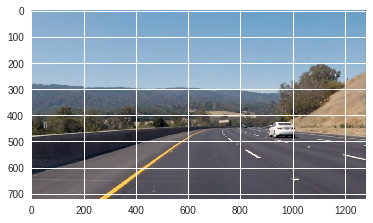

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

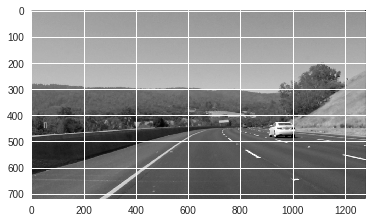

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="https://github.com/agungsantoso/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/conv-visualization/data/sobel_ops.png?raw=1" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

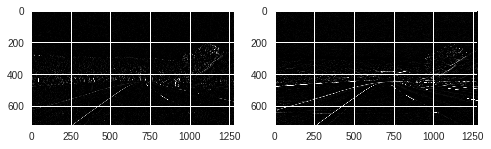

In [4]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

filtered_image = []
filtered_image.append(filtered_image_x)
filtered_image.append(filtered_image_y)

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    img = filtered_image[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



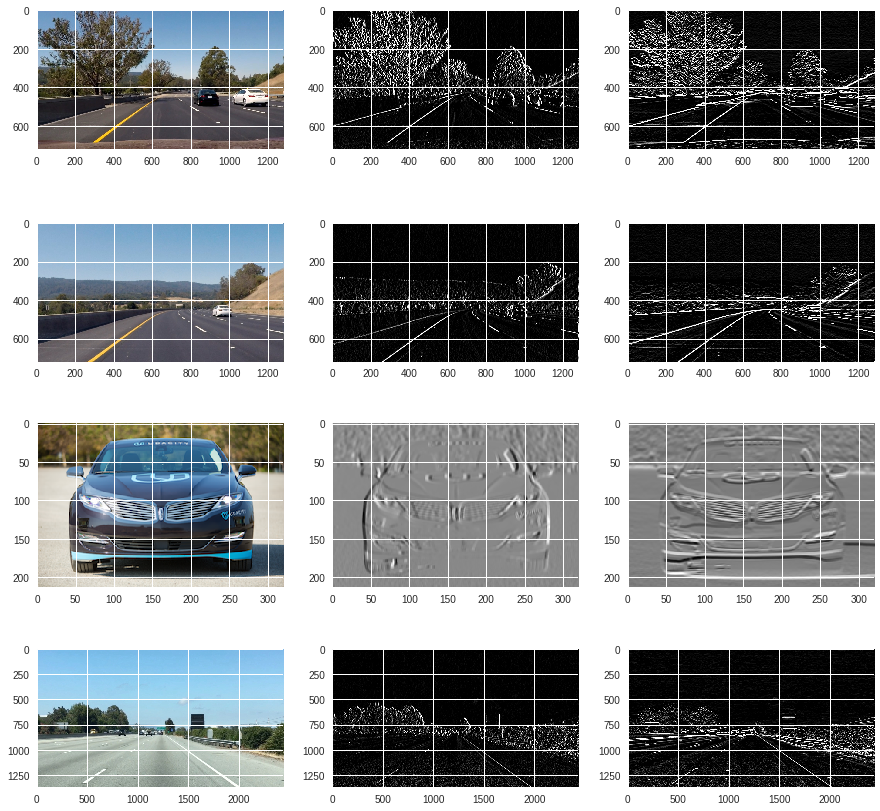

In [15]:
images = [
    'data/bridge_trees_example.jpg',
    'data/curved_lane.jpg',
    'data/udacity_sdc.png',
    'data/white_lines.jpg'
]

sobel_x = np.array([[-1, -0.2, 0, 0.2, 1],
                   [-1.5, -0.2, 0, 0.2, 1.5],
                   [-2, -0.2, 0, 0.2, 2],
                   [-1.5, -0.2, 0, 0.2, 1.5],
                   [-1, -0.2, 0, 0.2, 1]])
sobel_y = np.array([[ -1, -2, -2, -2, -1], 
                   [ -0.2, -0.2, -0.2, -0.2, -0.2],
                   [ 0, 0, 0, 0, 0],
                   [ 0.2, 0.2, 0.2, 0.2, 0.2],
                   [ 1, 2, 2, 2, 1]])

filtered_image = []

for image in images:  
  image = mpimg.imread(image)
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  # Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
  filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
  filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

  filtered_image.append(image)
  filtered_image.append(filtered_image_x)
  filtered_image.append(filtered_image_y)

fig=plt.figure(figsize=(15, 15))
columns = 3
rows = 4
for i in range(1, columns*rows +1):
    img = filtered_image[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()